# Classes

### Task 1

In [1]:
class Snail:
    def __init__(self, name = 'noname', species = 'unknown', age = 0, size = 0, status = 'inside'):
        self.name = name
        self.species = species
        self.age = age
        self.size = size
        self.status = status
    
    def age_group(self):
        if self.age <= 15:
            print('young')
        elif self.age <= 60:
            print('adult')
        else:
            print('old')
    
    def size_group(self):
        if self.size <= 20:
            print('small')
        elif self.size < 80:
            print('medium')
        else:
            print('large')
            
    def growth(self):
        self.size += 1
        
    def greet(self):
        if self.status == 'inside':
            print("Well, well. Look who's inside again.")
        elif self.status == 'outside':
            print("Hello, world!", " I am", self.name)
        else:
            print("I'm in a frightening, liminal space between states of being")
        

Examples

In [2]:
Kibula = Snail('Kibula', species = 'Lissachatina reticulata', age = 8, size = 20, status = 'outside')
Kibula.age_group()

young


In [3]:
Kibula.growth()
Kibula.size_group()

medium


In [4]:
Luca = Snail('Luca', age = 80, size = 150, status = 'problematic')
Luca.greet()

I'm in a frightening, liminal space between states of being


### Task 2

In [5]:
class RNA:
    
    def __init__(self, sequence):
        self.sequence = str(sequence).upper()
        
    def translation(self):
        seq = self.sequence
        code = {'UUU' : 'F', 'UUC' : 'F', 'UUA' : 'L', 'UUG' : 'L', 'UCU' : 'S', 'UCC' : 'S', 'UCA' : 'S', 'UCG' : 'S', 'UAU' : 'Y', 'UAC' : 'Y', 'UAA' : 'stop', 'UAG' : 'stop', 'UGU' : 'C', 'UGC' : 'C', 'UGA' : 'stop', 'UGG' : 'W', 'CUU' : 'L', 'CUC' : 'L', 'CUA' : 'L', 'CUG' : 'L', 'CCU' : 'P', 'CCC' : 'P', 'CCA' : 'P', 'CCG' : 'P', 'CAU' : 'H', 'CAC' : 'H', 'CAA' : 'Q', 'CAG' : 'Q', 'CGU' : 'R', 'CGC' : 'R', 'CGA' : 'R', 'CGG' : 'R', 'AUU' : 'I', 'AUC' : 'I', 'AUA' : 'I', 'AUG' : 'M', 'ACU' : 'T', 'ACC' : 'T', 'ACA' : 'T', 'ACG' : 'T', 'AAU' : 'N', 'AAC' : 'N', 'AAA' : 'K', 'AAG' : 'K', 'AGU' : 'S', 'AGC' : 'S', 'AGA' : 'R', 'AGG' : 'R', 'GUU' : 'V', 'GUC' : 'V', 'GUA' : 'V', 'GUG' : 'V', 'GCU' : 'A', 'GCC' : 'A', 'GCA' : 'A', 'GCG' : 'A', 'GAU' : 'D', 'GAC' : 'D', 'GAA' : 'E', 'GAG' : 'E', 'GGU' : 'G', 'GGC' : 'G', 'GGA' : 'G', 'GGG' : 'G'}
        protein =''
        while seq[0:3] != 'AUG':
            seq = seq[1:]
        while len(seq) > 2:
            if code[seq[0:3]] == 'stop':
                break
            protein += code[seq[0:3]]
            seq = seq[3:]
        print(protein)
        
    def reverse_transcription(self):
        pairs = {'A':'T', 'U':'A', 'G':'C', 'C':'G'}
        dna = ''
        for base in self.sequence:
            dna += pairs[base]
        print(dna)

Examples

In [6]:
seq1 = RNA('AAUGAAAUAUAUUCCUACAGGCCAUCCUAUCUGUCUCACGUAGAUGAAA')
seq1.translation()

MKYIPTGHPICLT


In [7]:
seq1.reverse_transcription()

TTACTTTATATAAGGATGTCCGGTAGGATAGACAGAGTGCATCTACTTT


### Task 3

In [8]:
class PositiveSet(set):
    def __init__(self, *args):
        self.set = set()
        for arg in args:
            if arg > 0:
                self.set.add(arg)
    def add(self, *args):
        for arg in args:
            if arg > 0:
                self.set.add(arg)

### Task 4

In [9]:
import matplotlib.pyplot as plt

class Fasta:
    
    def __init__(self, path):
        self.path = path
        
    def __repr__(self):
        return self.path
    
    def __str__(self):
        return self.path
    
    def seqs_number(self):
        self.number = 0
        with open(self.path) as file:
            for line in file:
                if line.startswith('>'):
                    self.number += 1
        print('There are', self.number, 'sequences in the file')
    
    def length_hist(self):
        length = []
        with open(self.path) as file:
            for line in file:
                if not line.startswith('>'):
                    length.append(len(line)-1)
        plt.hist(length)
        plt.title('Sequence length histogram')
        plt.xlabel('Length of sequences')
        plt.ylabel('Number of sequences')
        
    
    def gc_content(self):
        self.gc = 0
        gc, l = 0, 0
        with open(self.path) as file:
            for line in file:
                if not line.startswith('>'):
                    gc += line.count('C')
                    gc += line.count('G')
                    l += len(line)-1
        self.gc = 100*gc/l
        print('The gc-content is', self.gc, '%')
    
    def k_mer_hist(self, k):
        k_mer_counts = {}
        with open(self.path) as file:
            for line in file:
                if not line.startswith('>'):
                    while len(line) > 5:
                        k_mer = line[0:k]
                        if k_mer in k_mer_counts:
                            k_mer_counts[k_mer] += 1
                        else:
                            k_mer_counts[k_mer] = 1
                        line = line[1:]
        fig, ax = plt.subplots(figsize=(100, 50))
        for label in (ax.get_xticklabels()):
            label.set_fontsize(10)
        ax.bar(list(k_mer_counts.keys()), k_mer_counts.values())
        ax.set_xlabel(f'{k}-mer frequency')
        ax.tick_params(axis='y')
        ax.set_title(f'Distribution of {k}-mers')
        plt.xticks(rotation=90)
        plt.show()
        
    def four_mer_hist(self):
        self.k_mer_hist(4)
        
    def all_metrics(self):
        self.seqs_number()
        self.length_hist()
        self.gc_content()
        self.four_mer_hist()

Examples

There are 7 sequences in the file
The gc-content is 35.43974720959425 %


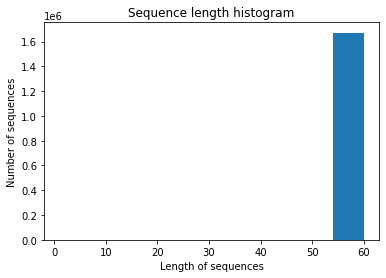

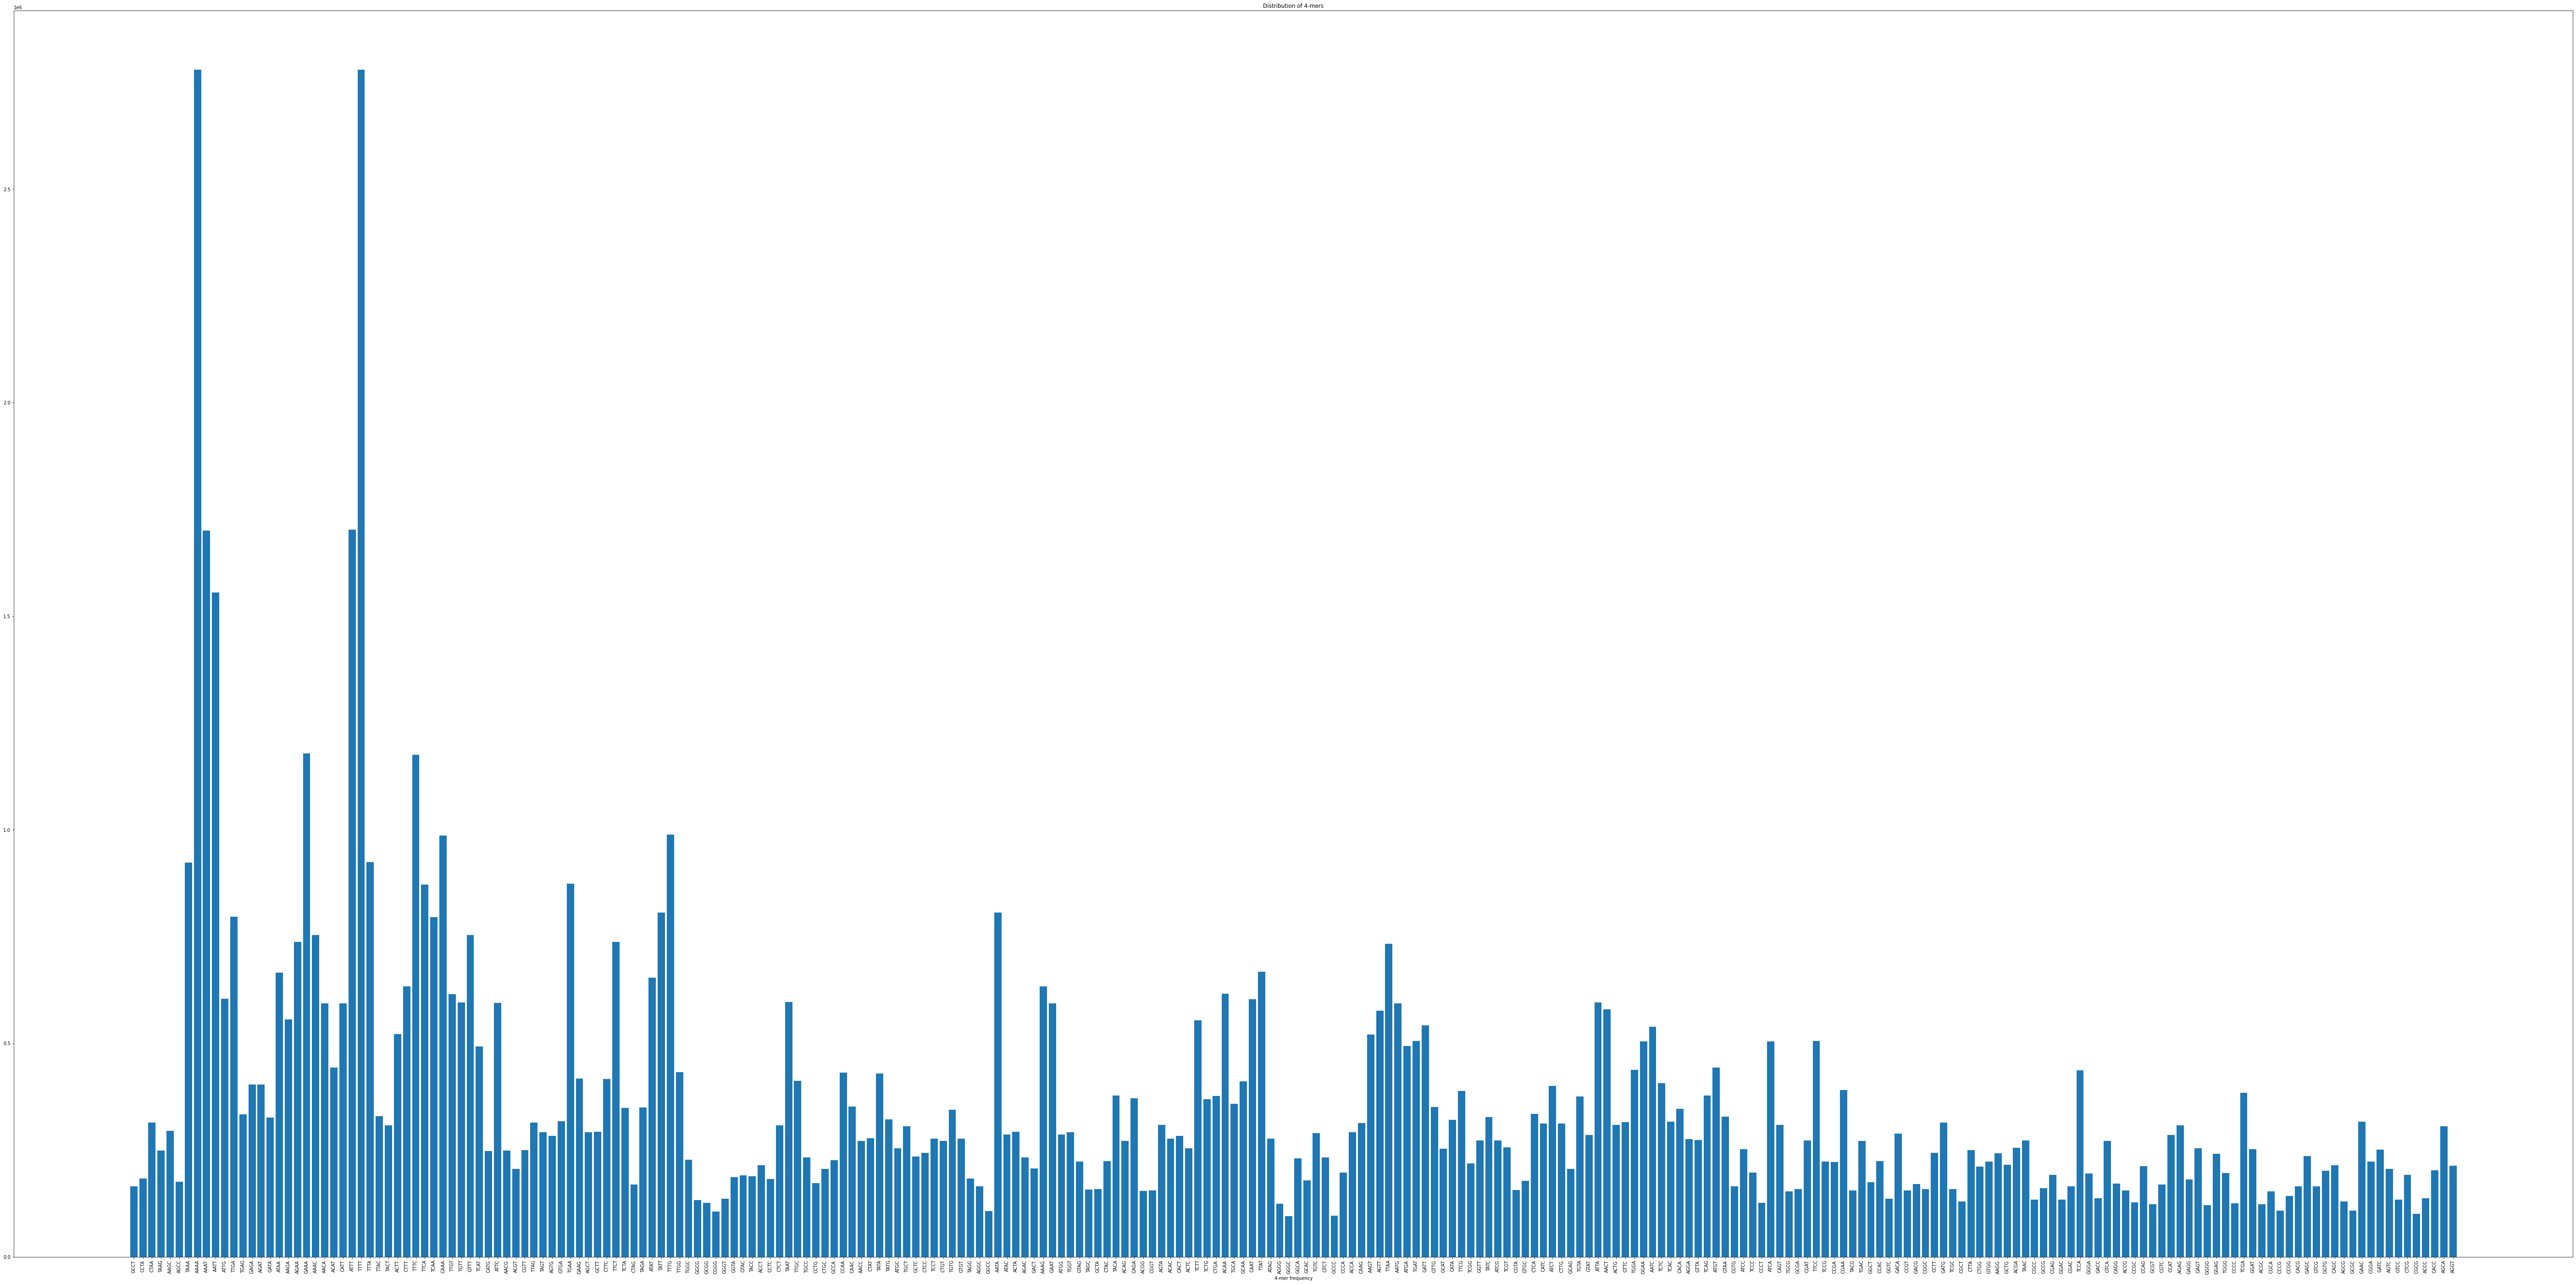

In [10]:
test_path = './test_data/test.fa'
test = Fasta(test_path)
test.all_metrics()

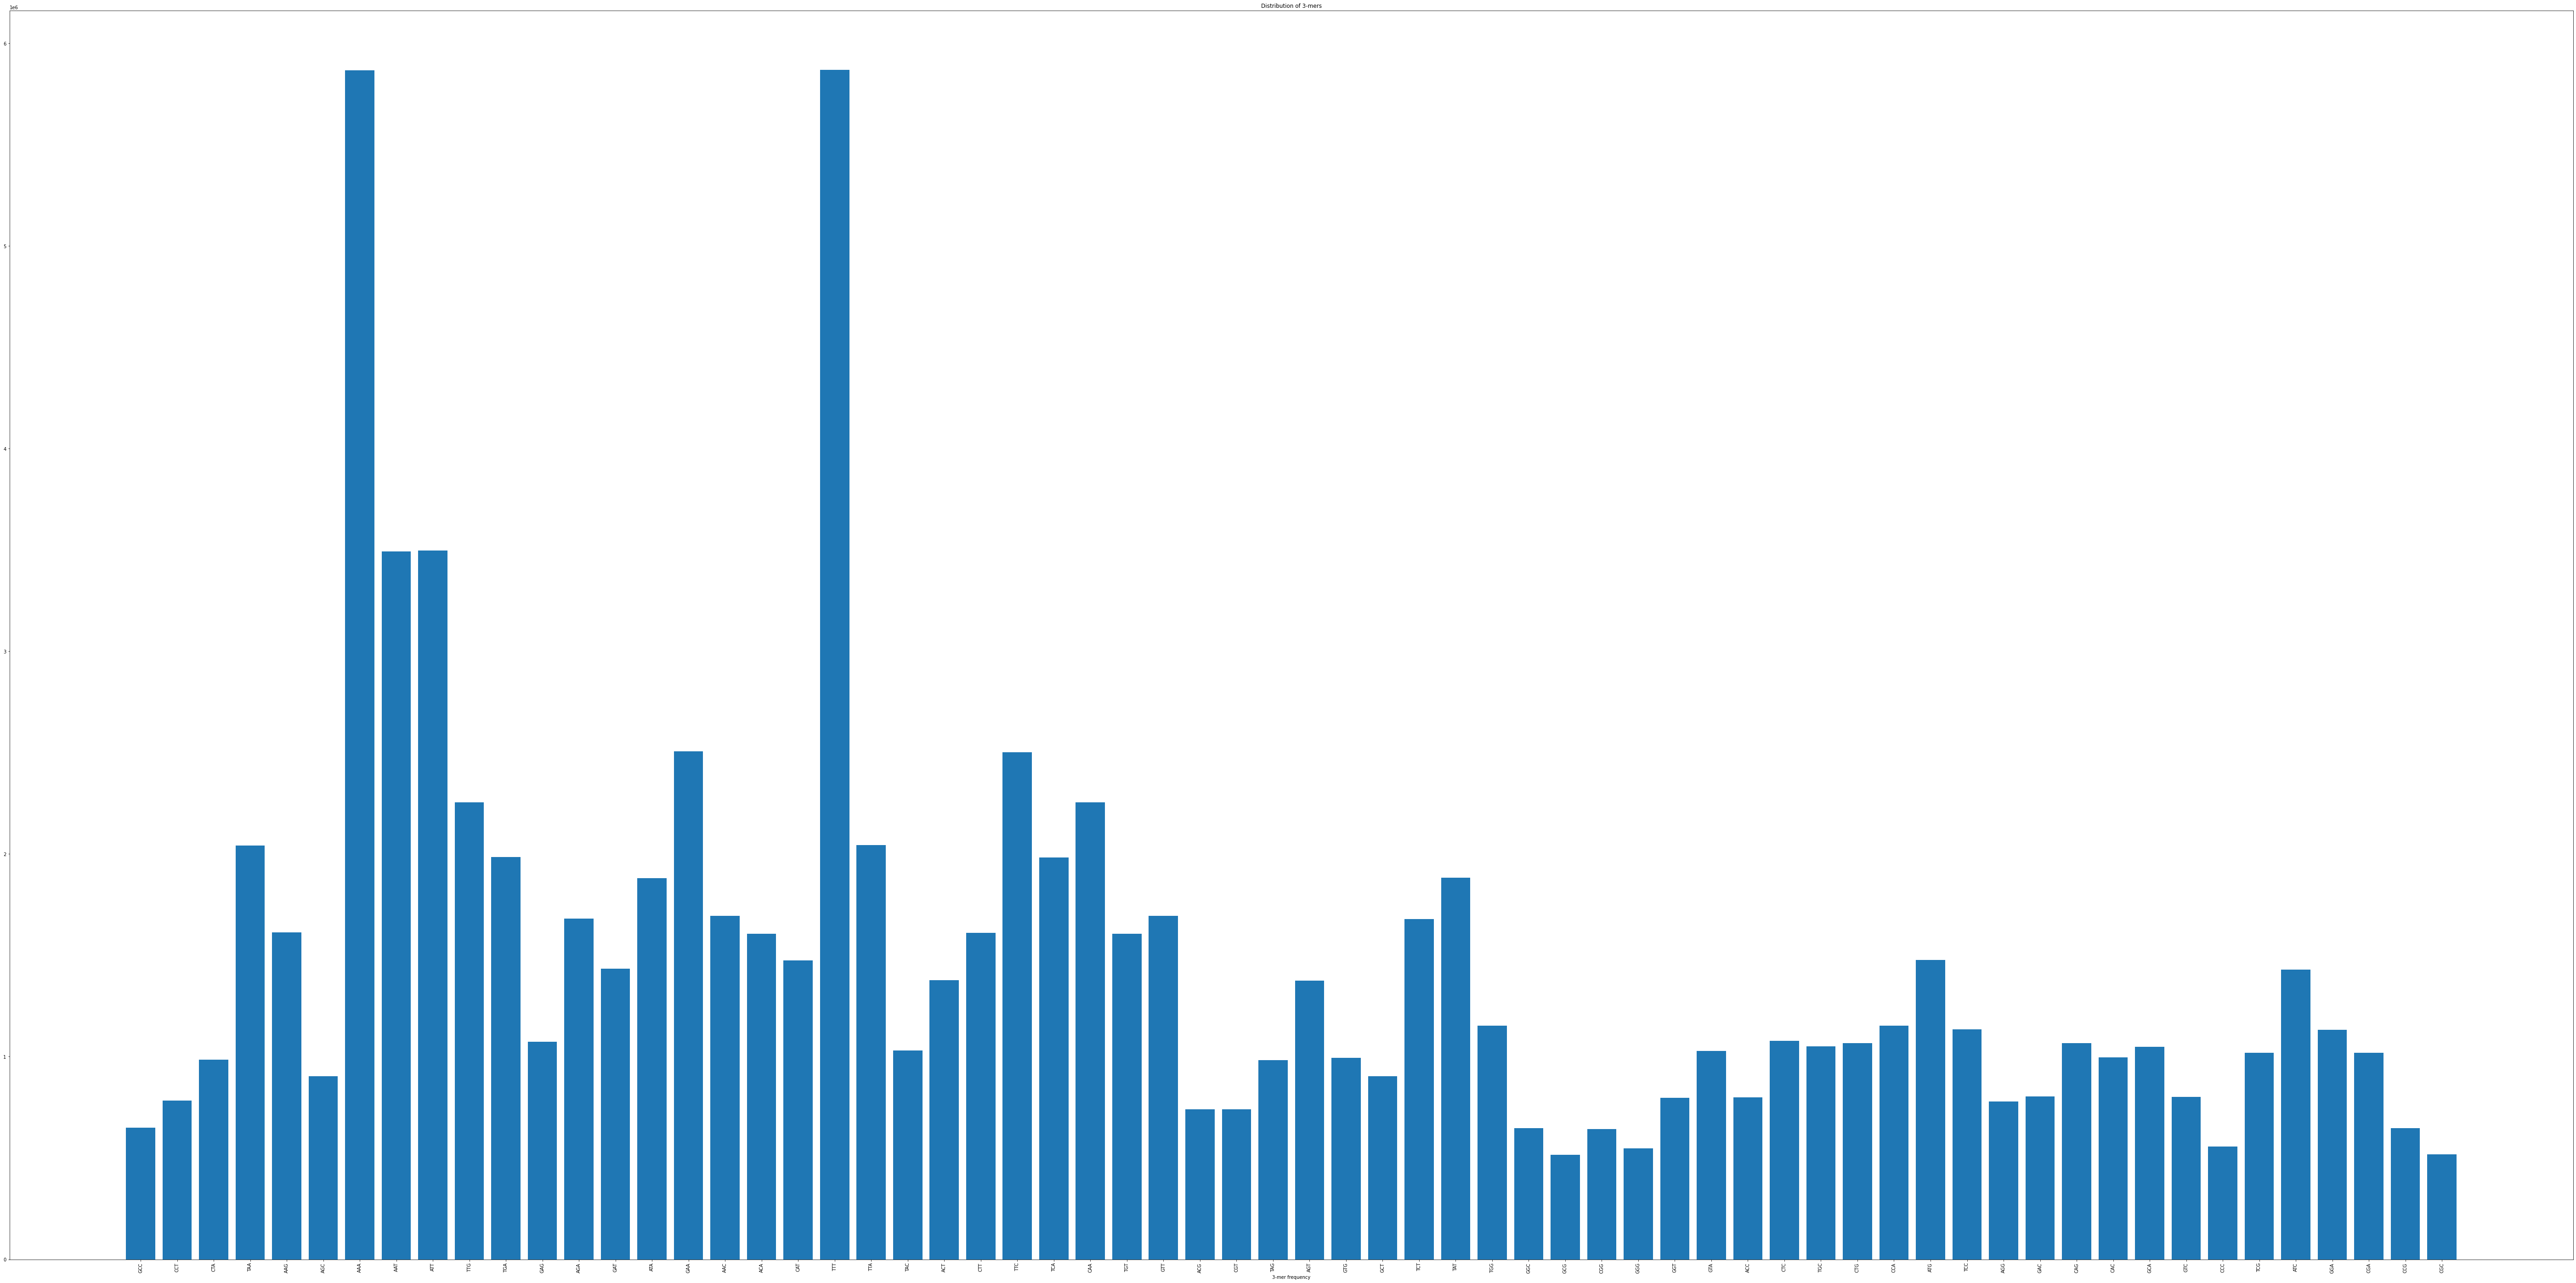

In [11]:
test.k_mer_hist(3)